### Logistics Analysis

In this exercise you will answer a set of questions as you work through a logistics problem. 

#### Preliminary Research

<ul>
<li>Start by reading the possible role of AI in last-mile delivery as seen by DHL: https://www.dhl.com/discover/en-global/logistics-advice/logistics-insights/ai-in-logistics-and-last-mile-delivery.</li>
<li>See how other factors can also affect last-mile delivery, and be aware of possible collaborations here: https://d3.harvard.edu/platform-rctom/submission/where-is-my-package-dhls-machine-learning-works-to-provide-more-reliable-data-to-customers/.</li>

<li>Further info can be found here: https://d3.harvard.edu/platform-rctom/submission/dhl-cracking-logistics-with-the-help-of-machine-learning/#_ftn2.</li>


### Problem Definition

1. What would you say is the goal of a logistics company? If you were to use a couple of metrics to define what success means for a logistics company (last-mile deliver), what would they be?

2. Now take a moment to define the steps of last-mile deliveries. You can use any source you want or rely on your own experience as a customer. There are a lot of steps and you don't need to outline all of them. Just draft a general overview of the process, and what you consider important from your own experience or judgement.

3. Look at the steps you have considered. They all seem important but choose a specific context and decide which of those steps you think are key for the success of the process. Then think about the data that you could collect at those points, given the knowledge you have. What kind of data would you like to have in order to improve the performance and quality. 

4. The previous analysis would be done with the client, and in general, at least at the beginning, you might find that you need to work with what the client has. 

The following dataset is from Amazon. Imagine this is the data that you have to work with, so take some time to familiarize yourself with it, and decide how close or far the data is from what you would have ideally collected. 

https://www.kaggle.com/datasets/sujalsuthar/amazon-delivery-dataset

At this point you want to define (not compulsory but useful) what kind of system you are looking at. Is it a simple system in which case the scope of data analysis and the application of machine learning might be limited? Or is it a complicated system where you would improve performance to a new level? Or is it a complex system and you expect to find new insights that can change the nature of the business? How would yo present this to the client?

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
#from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
from collections import Counter
import plotly.express as px
#warnings.filterwarnings("ignore")
pd.set_option("display.max_rows",None)
from sklearn import preprocessing
import matplotlib 
matplotlib.style.use('ggplot')
from sklearn.preprocessing import LabelEncoder

In [2]:
az = pd.read_csv('amazon_delivery.csv')

In [3]:
az.head()

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys


In [4]:
az.dtypes

Order_ID            object
Agent_Age            int64
Agent_Rating       float64
Store_Latitude     float64
Store_Longitude    float64
Drop_Latitude      float64
Drop_Longitude     float64
Order_Date          object
Order_Time          object
Pickup_Time         object
Weather             object
Traffic             object
Vehicle             object
Area                object
Delivery_Time        int64
Category            object
dtype: object

In [5]:
string_col = az.select_dtypes(include="object").columns
az[string_col]=az[string_col].astype("string")

In [6]:
az.dtypes

Order_ID           string[python]
Agent_Age                   int64
Agent_Rating              float64
Store_Latitude            float64
Store_Longitude           float64
Drop_Latitude             float64
Drop_Longitude            float64
Order_Date         string[python]
Order_Time         string[python]
Pickup_Time        string[python]
Weather            string[python]
Traffic            string[python]
Vehicle            string[python]
Area               string[python]
Delivery_Time               int64
Category           string[python]
dtype: object

In [7]:
string_col=az.select_dtypes("string").columns.to_list()
string_col

['Order_ID',
 'Order_Date',
 'Order_Time',
 'Pickup_Time',
 'Weather',
 'Traffic',
 'Vehicle',
 'Area',
 'Category']

Text(0.5, 1.0, 'Amazon delivery Correlation Heatmap')

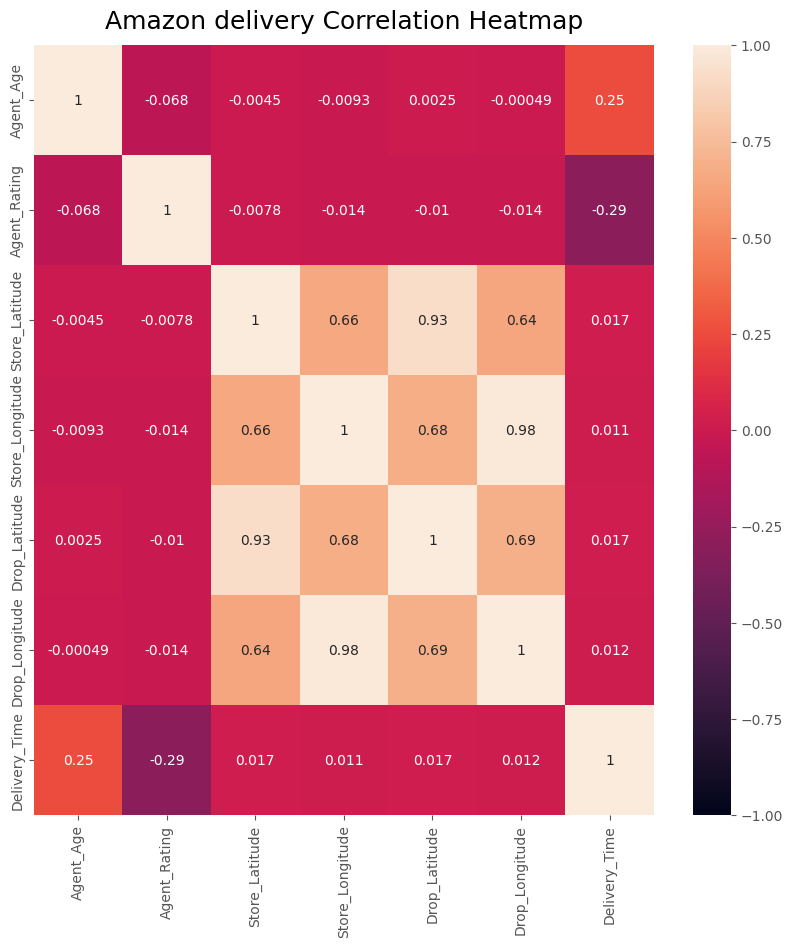

In [8]:
plt.figure(figsize = (10, 10))
heatmap = sns.heatmap(az.corr(numeric_only = True), vmin = -1, vmax = 1, annot = True)
heatmap.set_title('Amazon delivery Correlation Heatmap', fontdict = {'fontsize' : 18}, pad = 12)

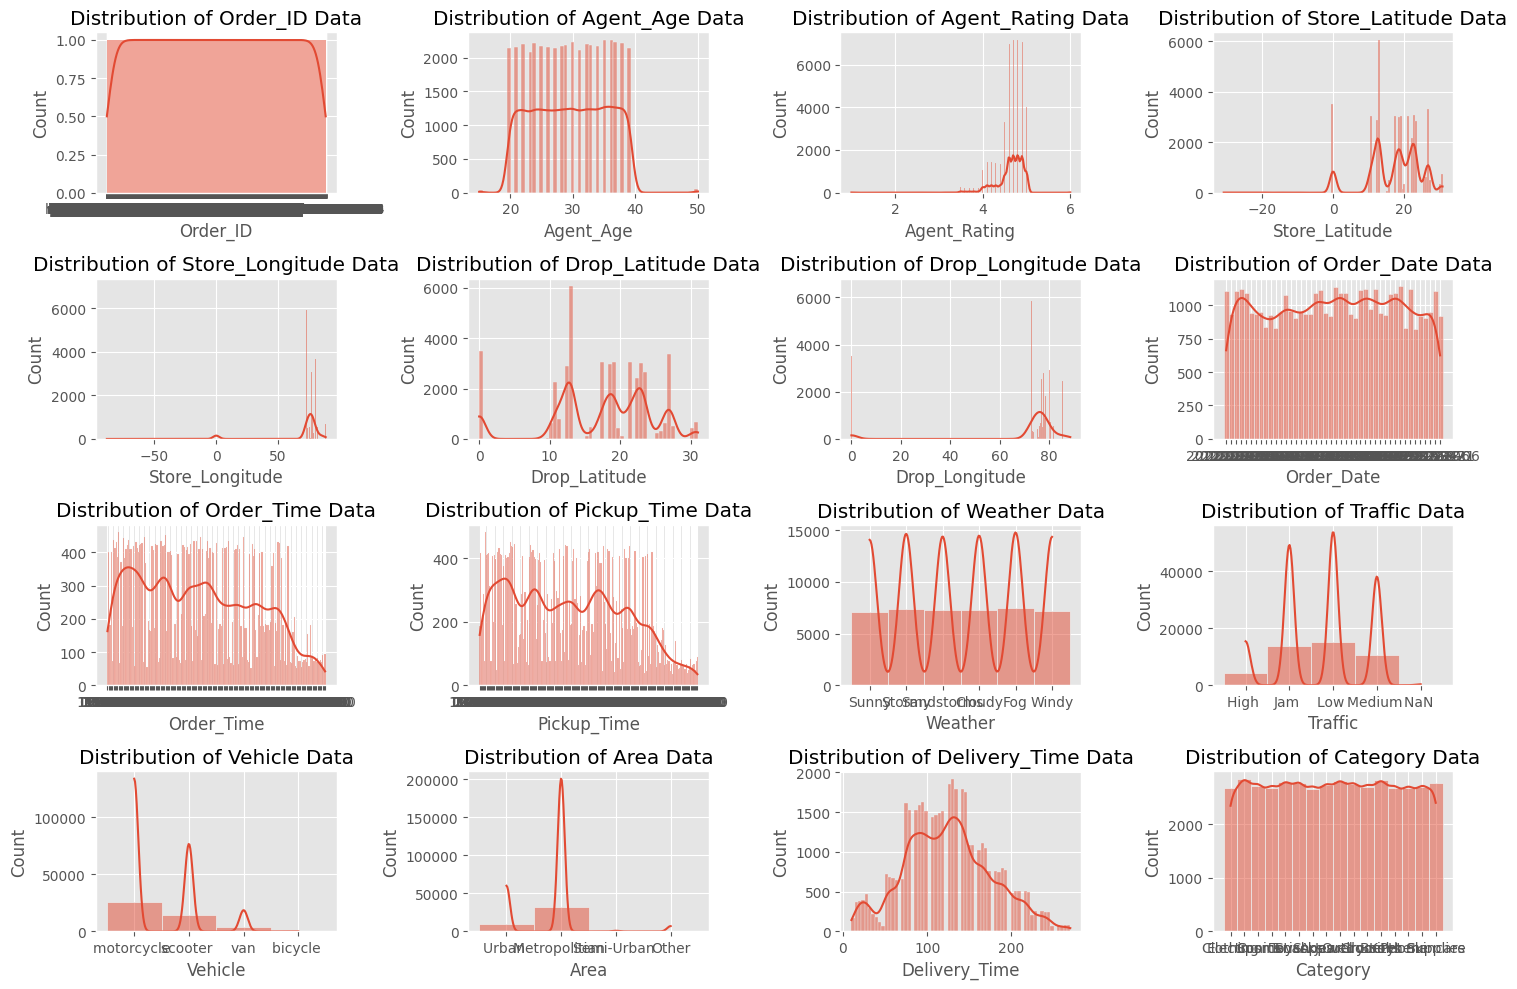

In [9]:
plt.figure(figsize=(15,10))
for i,col in enumerate(az.columns,1):
    plt.subplot(4,4,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(az[col],kde=True)
    plt.tight_layout()
    plt.plot()